In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## **DATA DESCRIPTION**
PRODUCT <br/>

AGE - age of the borrower<br/>

AREA - residential area ('County capital' 'Urban area' 'Rural area' 'Missing')<br/>

RESIDENTIAL PLACE - housing situation ('Owner without mortgage' 'Living with family' 'Owner with mortgage'
'Rental' 'Other')<br/>

EDUCATION - education level ('University' 'Post-graduate' 'High school' 'Missing'
'Post-secondary school' 'Other' 'College' 'Vocational school'
'Middle school' 'Primary school')<br/>

MARITAL STATUS - marital status ('married' 'divorced' 'single' 'widow')<br/>

HOUSEHOLD MEMBERS - number of people in the household<br/>

NO OF DEPENDENTS - number of dependents of the client<br/>

INCOME - income ($/month ?)<br/>

WORK SENIORITY - work experience<br/>

BUSINESS AGE - business experience (if self-employed)<br/>

ECONOMIC SECTOR - sector in which the borrower works<br/>

EMPLOYEE NO - number of employees<br/>

LENGTH RELATIONSHIP WITH CLIENT - duration of the business relationship with the client<br/>

DEBIT CARD - whether the client has a debit card<br/>

CURRENT ACCOUNT - <br/>

SAVING ACCOUNT - whether the client has a savings account<br/>

SALARY ACCOUNT - <br/>

FOREIGN ACCOUNT - whether the client has a foreign currency account<br/>

FINALIZED LOAN - whether the client has repaid the loan<br/>

DEPOSIT - <br/>

PENSION FUNDS - <br/>

**DEFAULT FLAG** - whether the client has payment arrears (**1 - yes, 0 - no**)<br/>

BASIC INFO

In [2]:
df = pd.read_csv('../../data/orig_train.csv')

In [3]:
df.head().T

,0,1,2,3,4
PRODUCT,C,C,F,C,B
AGE,65,64,30,39,38
AREA,County capital,County capital,Urban area,County capital,County capital
RESIDENTIAL_PLACE,Owner without mortgage,Owner without mortgage,Living with family,Owner without mortgage,Owner without mortgage
EDUCATION,University,University,University,Post-graduate,Highschool
MARITAL_STATUS,married,married,married,divorced,single
HOUSEHOLD_MEMBERS,2,2,2,1,1
NO_OF_DEPENDENTS,0,0,0,0,0
INCOME,1245.0,1380.0,1131.0,1730.0,1189.0
WORK_SENIORITY,5,5,2,9,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

No null values in data frame

In [5]:
for col in df:
    print(col, df[col].unique())

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area' 'Missing']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Missing'
 'Post secondary school' 'Other' 'College' 'Vocational school'
 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  

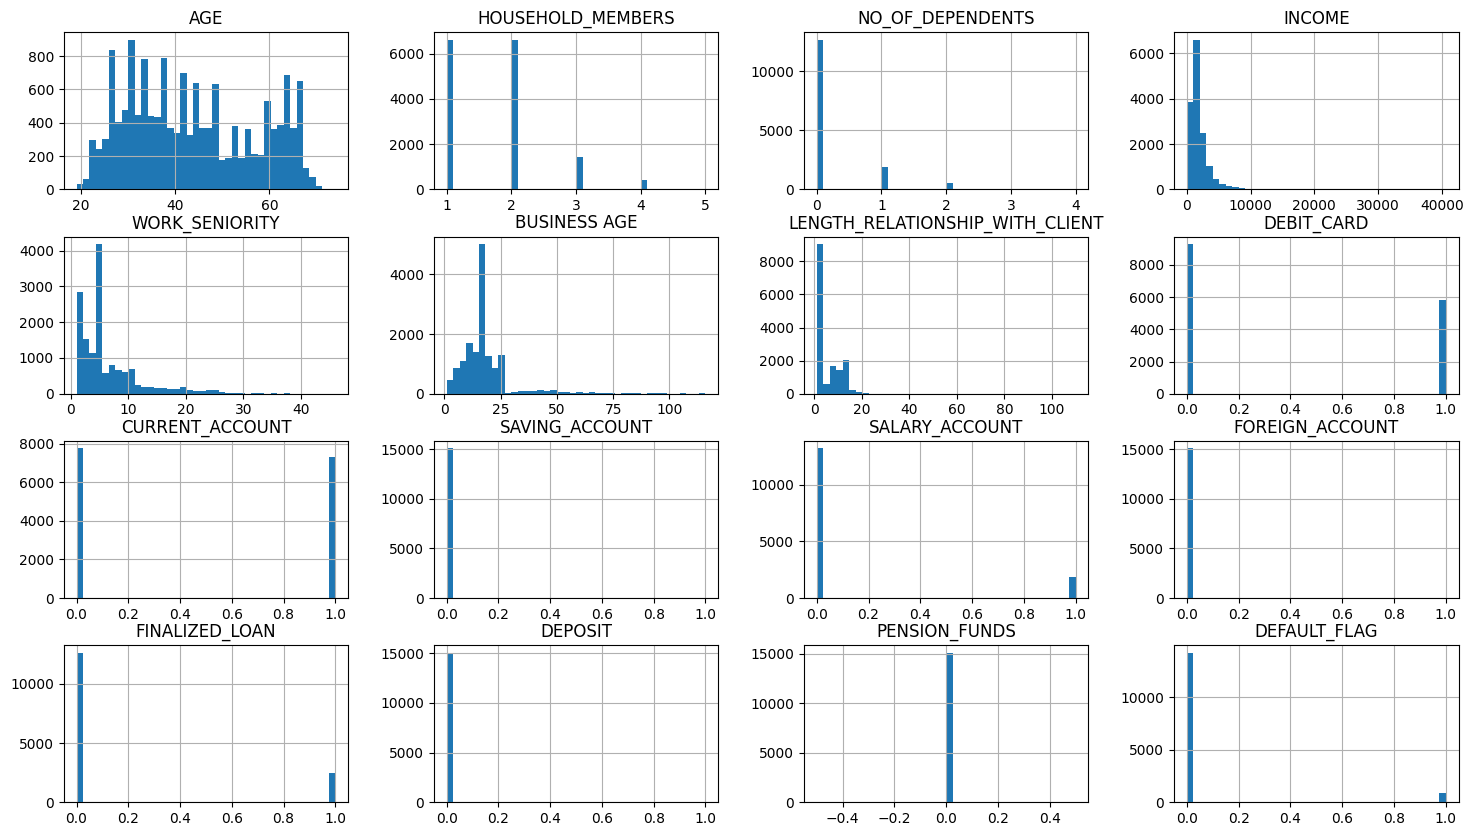

In [9]:
df.hist(bins = 40, figsize = (18, 10))
plt.show()

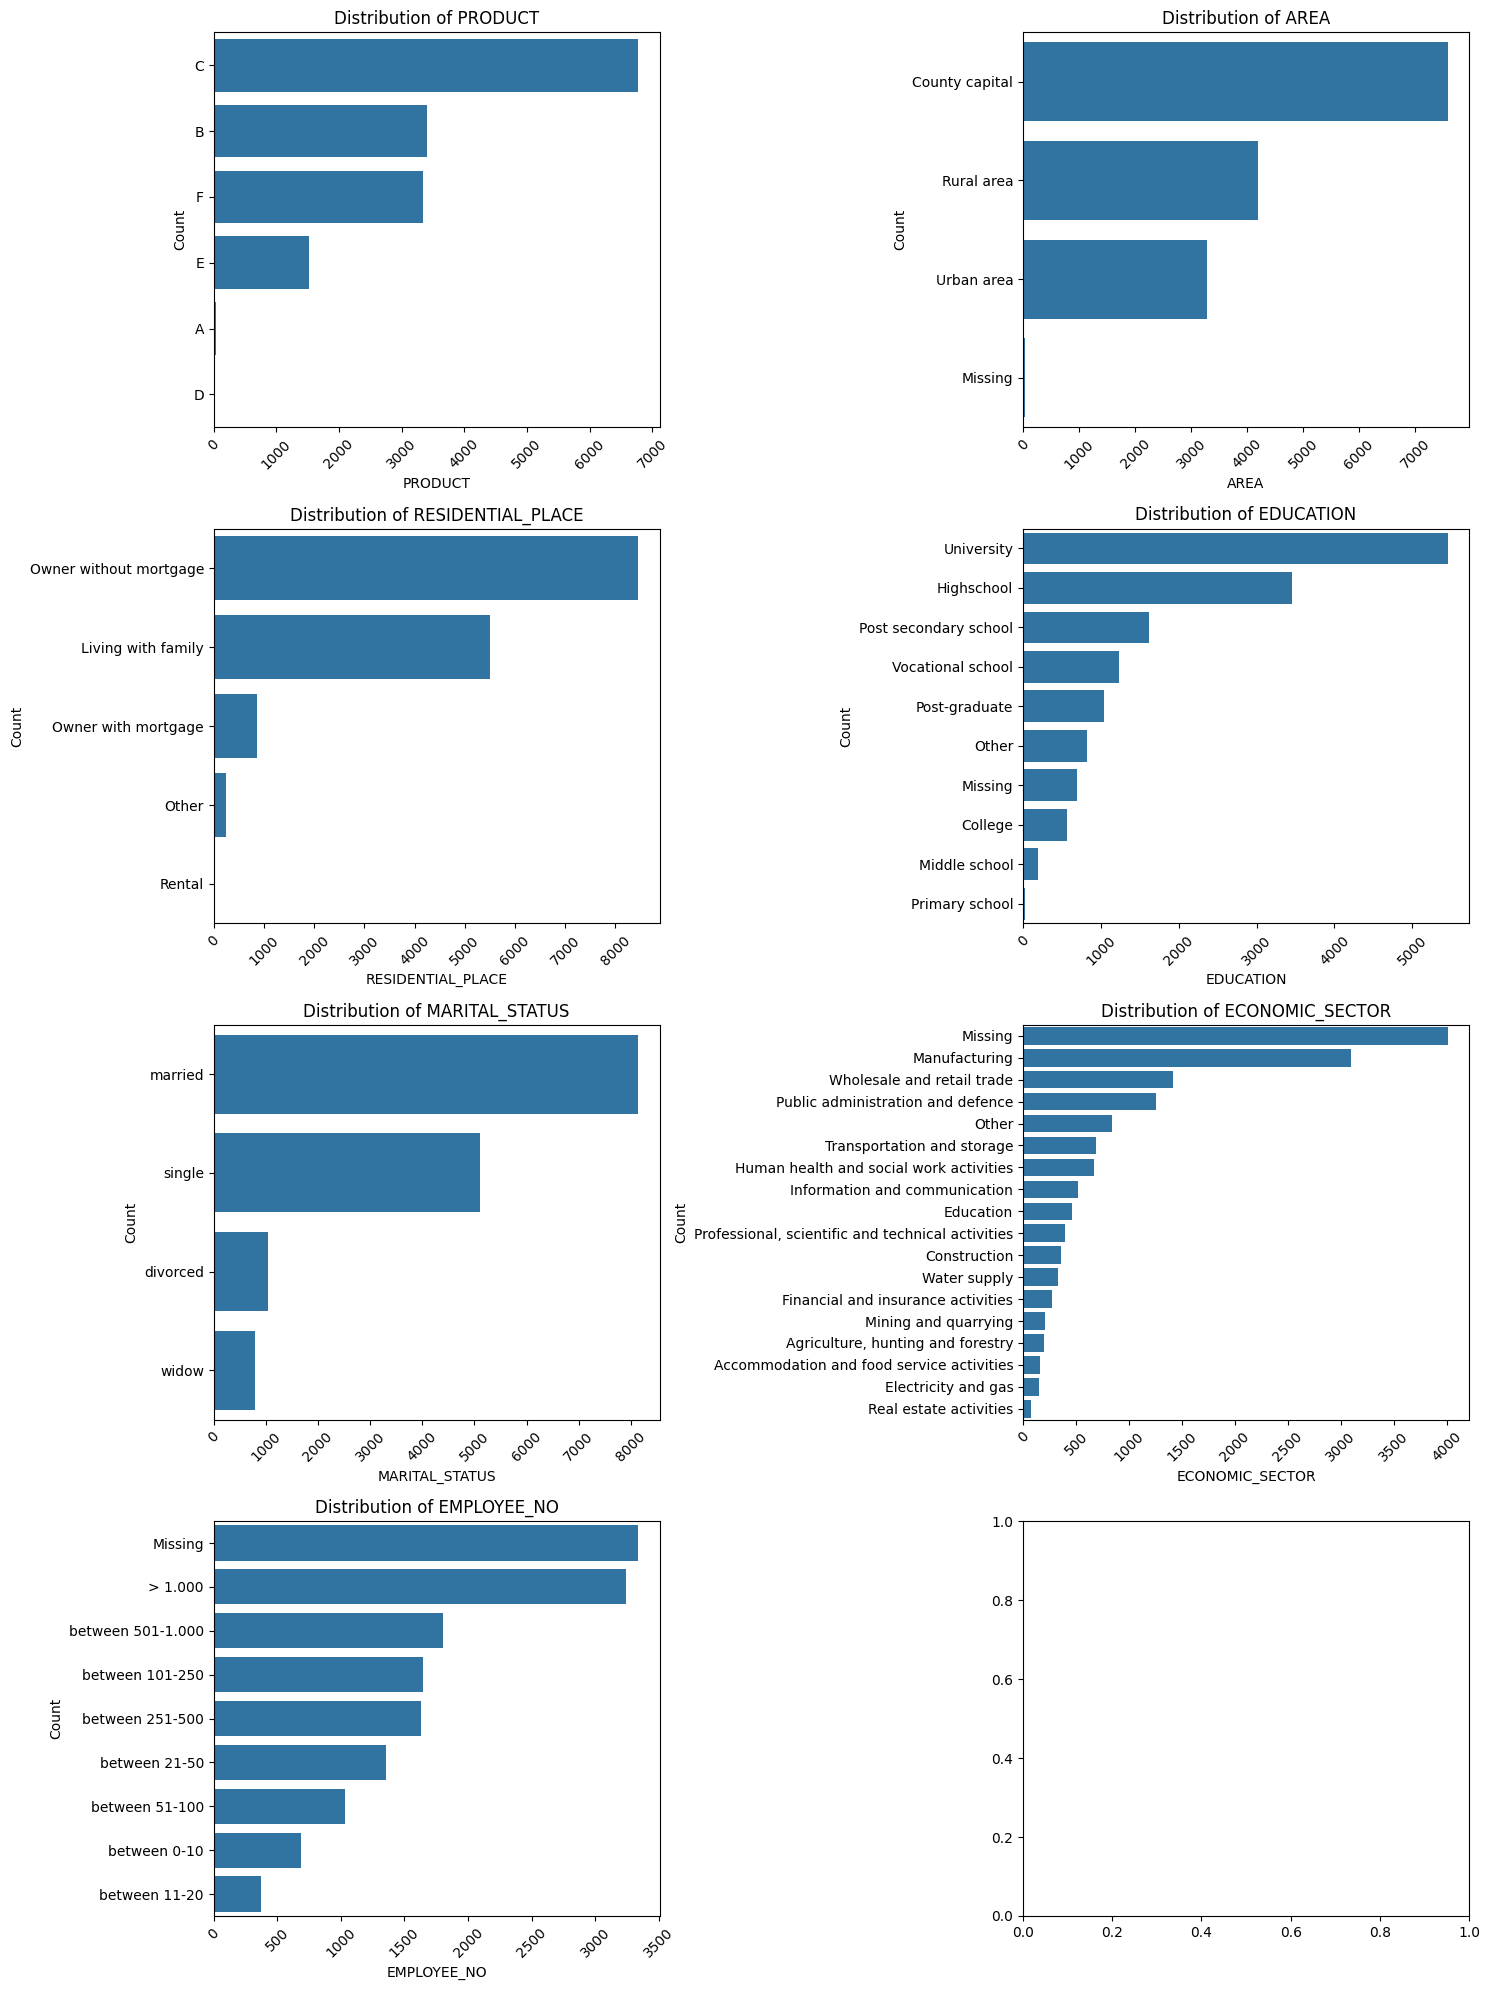

In [13]:
categorical_variables = df.select_dtypes(include=['object'])

def plot_categorical_distribution(df):
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.countplot(data=df, y=column, order=df[column].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45) 
    
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(categorical_variables)

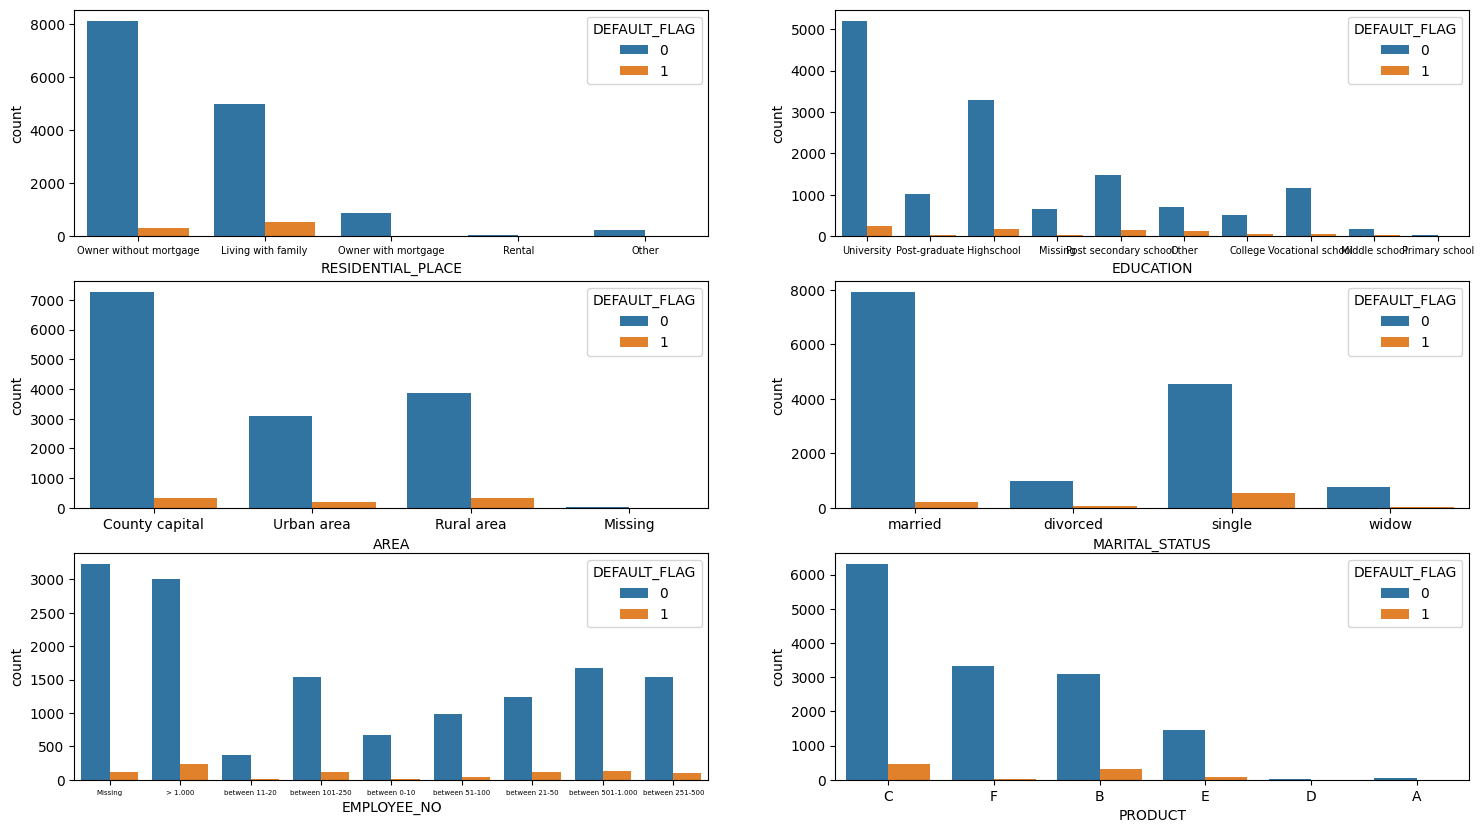

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 10))
sns.countplot(x = "RESIDENTIAL_PLACE", hue = "DEFAULT_FLAG", data = df, ax = axes[0, 0])
sns.countplot(x = "EDUCATION", hue = "DEFAULT_FLAG", data = df, ax = axes[0, 1])
sns.countplot(x = "AREA", hue = "DEFAULT_FLAG", data = df, ax = axes[1, 0])
sns.countplot(x = "MARITAL_STATUS", hue = "DEFAULT_FLAG", data = df, ax = axes[1, 1])
sns.countplot(x = "EMPLOYEE_NO", hue = "DEFAULT_FLAG", data = df, ax = axes[2, 0])
sns.countplot(x = "PRODUCT", hue = "DEFAULT_FLAG", data = df, ax = axes[2, 1])

axes[0, 0].tick_params(axis = "x", labelsize = 7)
axes[0, 1].tick_params(axis = "x", labelsize = 7)
axes[2, 0].tick_params(axis = "x", labelsize = 5)


## Comments

Columns 'economic_sector' and 'employee_no' have a lot of Missing values

Small portion of products are of type A or D

Something more?

In [6]:
col_names = ['AREA', 'EDUCATION', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']
for col_name in col_names:
    print(df[col_name].value_counts()['Missing']/len(df))

0.002185864741339339
0.04577068291713585
0.2655494469099821
0.2211035305027489


Imputing missing values, first we check the most frequent value in each column

In [7]:
for col_name in col_names:
    most_frequent = df[col_name].mode()
    print(most_frequent)

0    County capital
Name: AREA, dtype: object
0    University
Name: EDUCATION, dtype: object
0    Missing
Name: ECONOMIC_SECTOR, dtype: object
0    Missing
Name: EMPLOYEE_NO, dtype: object


In two columns mode is the missing value, we have to imput it using different technique
In the two remaining columns we replace missing values with mode

In [15]:
df['AREA'] = df['AREA'].replace('Missing', df['AREA'].mode()[0])
df['EDUCATION'] = df['EDUCATION'].replace('Missing', df['EDUCATION'].mode()[0])

In the remaining columns we will impute misisng values so that they matching non-missing values distribution

In [16]:
def impute_following_distribution(df, col_name):
    value_counts = df[col_name].value_counts()
    number_of_missing_values = value_counts['Missing']
    value_counts_dict = value_counts[1:].to_dict()

    for key in value_counts_dict.keys():
        value_counts_dict[key] = value_counts_dict[key] / (len(df) - number_of_missing_values)

    df[col_name] = df[col_name].replace('Missing', np.random.choice(list(value_counts_dict.keys()), p=list(value_counts_dict.values())))

impute_following_distribution(df, 'ECONOMIC_SECTOR')
impute_following_distribution(df, 'EMPLOYEE_NO')

for col in df:
    print(col, df[col].unique())

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Post secondary school' 'Other'
 'College' 'Vocational school' 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  62  36  66  61
   2  

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


Some variables seem to have low variance: saving_account, foreign_account, deposit, pension_funds

In [18]:
low_variance_col_names = ['SAVING_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT', 'PENSION_FUNDS']
for col_name in low_variance_col_names:
    print(df[col_name].value_counts())

SAVING_ACCOUNT
0    15091
1        6
Name: count, dtype: int64
FOREIGN_ACCOUNT
0    15095
1        2
Name: count, dtype: int64
DEPOSIT
0    15041
1       56
Name: count, dtype: int64
PENSION_FUNDS
0    15097
Name: count, dtype: int64


We can delete above variables from dataframe

In [19]:
df = df.drop(low_variance_col_names, axis=1)

Encoding categorical variables

Variables that are not ordinal: Product, Area, Residential_place, Education, Martial_status

We will encode Employee_no to preserve order of its values

In [20]:
categorical_col_names = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS',
       'ECONOMIC_SECTOR']

df = pd.get_dummies(df, columns=categorical_col_names)

In [21]:
df.EMPLOYEE_NO.unique()

array(['between 501-1.000', '> 1.000', 'between 11-20', 'between 101-250',
       'between 0-10', 'between 51-100', 'between 21-50',
       'between 251-500'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder(categories=[['between 0-10', 'between 11-20',
                                             'between 21-50', 'between 51-100',
                                             'between 101-250', 'between 251-500',
                                             'between 501-1.000', '> 1.000']])

df['EMPLOYEE_NO'] = ordinalEncoder.fit_transform(df[['EMPLOYEE_NO']])

In [23]:
df.head().T

,0,1,2,3,4
AGE,65,64,30,39,38
HOUSEHOLD_MEMBERS,2,2,2,1,1
NO_OF_DEPENDENTS,0,0,0,0,0
INCOME,1245.0,1380.0,1131.0,1730.0,1189.0
WORK_SENIORITY,5,5,2,9,5
BUSINESS AGE,16,16,6,13,16
EMPLOYEE_NO,6.0,6.0,7.0,1.0,6.0
LENGTH_RELATIONSHIP_WITH_CLIENT,1,8,1,2,1
DEBIT_CARD,0,0,1,0,1
CURRENT_ACCOUNT,0,0,1,0,1


<Axes: >

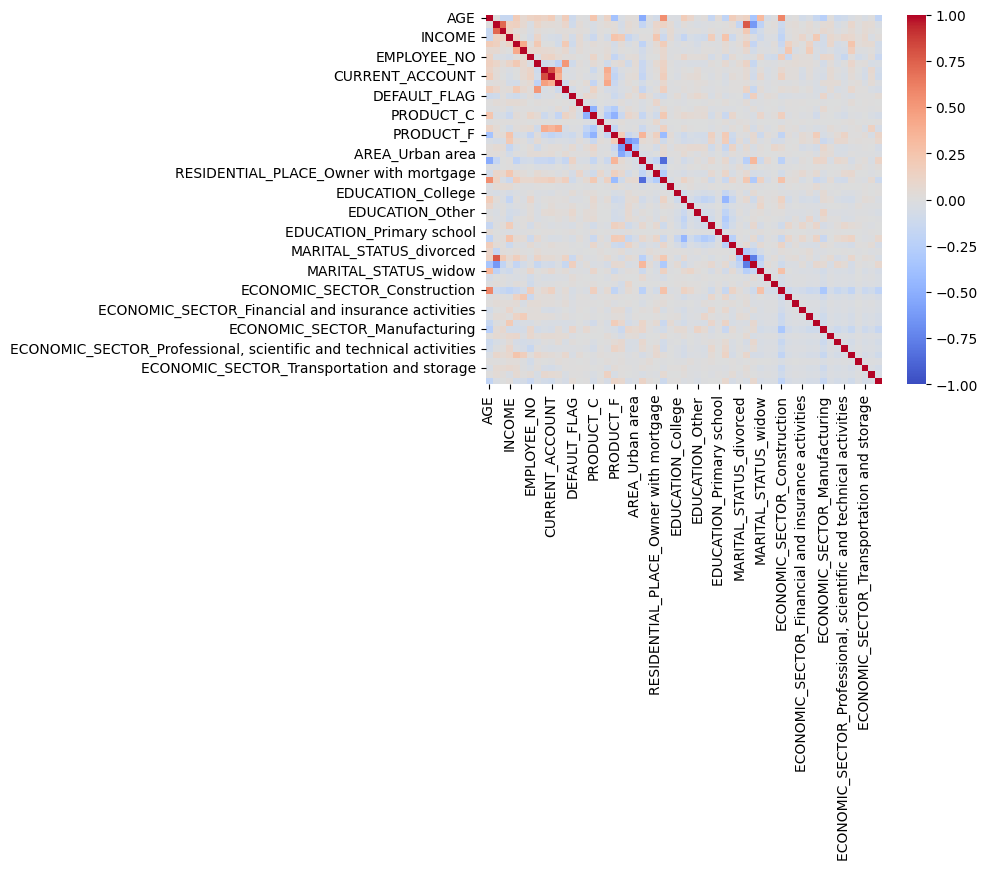

In [24]:
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt='.1f', center = 0, vmin = -1, vmax = 1)